In [2]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageOps, ImageFont
import os
import matplotlib.pyplot as plt


In [3]:
# Characters used for Mapping to Pixels
Character = {
    "standard": "@%#*+=-:. ",
    "complex": "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^`'. "
}


def get_data(mode, fontSize):
    font = ImageFont.truetype("fonts/DejaVuSansMono-Bold.ttf", size=fontSize)
    scale = 2
    char_list = Character[mode]
    return char_list, font, scale


def ShowImg(image, pil=False):
    cv2_img = image.copy()
    if pil:
        cv2_img = PIL2CV2(image)
    plt.imshow(cv2.cvtColor(cv2_img,cv2.COLOR_BGR2RGB))


def PIL2CV2(image):
    cv2_img = np.array(image)
    if(len(cv2_img.shape) == 3):
        cv2_img = cv2.cvtColor(cv2_img, cv2.COLOR_RGB2BGR)
    return cv2_img



In [4]:
char_list, font, scale = get_data("complex", 8)

In [5]:
def AscifyImage(image, bg="black", res=-1):
    if bg == "white":
        bg_code = 255
    elif bg == "black":
        bg_code = 0
    image_height, image_width, _ = image.shape
    if res != -1:
        scale = image_width/res
        image_width = res
        image_height = int(image_height/scale)
        image = cv2.resize(image, (image_width, image_height))
    font_width, font_height = font.getsize("A")

    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    rgb_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)

    output = np.zeros_like(image)
    if bg_code != 0:
        output.fill(255)

    pillow_output = Image.fromarray(output)
    pillow_drawer = ImageDraw.Draw(pillow_output)
    num_rows = int(image_height / font_height)
    num_cols = int(image_width / font_width)

    for i in range(num_rows):
        for j in range(num_cols):
            y_start = i*font_height
            x_start = j*font_width
            x_end = x_start + font_width
            y_end = y_start + font_height

            intensity = np.mean(lab_image[y_start:y_end, x_start:x_end, 0])
            # intensity = 233

            position = int((intensity/255) * (len(char_list)-1))

            color = np.mean(rgb_image[y_start:y_end, x_start:x_end], axis=(
                0, 1)).astype(np.uint8)
            # color = (255, 255, 255)

            pillow_drawer.text((x_start, y_start), str(
                char_list[position]), font=font, fill=tuple(color))

    output = np.array(pillow_output)

    output_hsv = cv2.cvtColor(output, cv2.COLOR_RGB2HSV)
    output_hsv[..., 1] = cv2.equalizeHist(output_hsv[..., 1])
    output_hsv[..., 2] = cv2.equalizeHist(output_hsv[..., 2])
    output_bgr = cv2.cvtColor(output_hsv, cv2.COLOR_HSV2BGR)
    return output_bgr
    ShowImg(output_bgr)

In [6]:
vidPath = os.path.join('data', 'Video_Sample.mp4')
vidCap = cv2.VideoCapture('./data/Video_Sample.mp4')
# ret, frame = vidCap.read()
# ShowImg(frame, True)
# AscifyFrame(image = frame, bg="white")
asciiFrames = []
frame_skip = 3
for frame_idx in range(int(vidCap.get(cv2.CAP_PROP_FRAME_COUNT))):
    # Reading a frame
    ret, frame = vidCap.read()
    if ret == False:
        break
    if frame_idx%frame_skip!=0:
        continue
    asciiFrames.append(AscifyImage(frame, bg="black", res=500))
    print(frame_idx)
print("Done Preprocessing")


0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147
150
153
156
159
162
165
Done Preprocessing


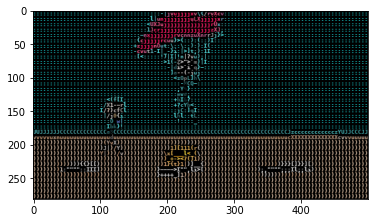

In [11]:
plot = plt.imshow(cv2.cvtColor(asciiFrames[0],cv2.COLOR_BGR2RGB))
plt.ion()
for asciiFrame in asciiFrames:
   plot.set_data(cv2.cvtColor(asciiFrame,cv2.COLOR_BGR2RGB))
   plt.pause(0.2)
vidCap.release()